In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def campo (x,y,z,a=0.5):
    f_x = lambda phi: (x-a*np.cos(phi))/((x**2) + (y**2) + (z**2) + (a**2) - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi))**(3/2)
    f_y = lambda phi: (y-a*np.sin(phi))/((x**2) + (y**2) + (z**2) + (a**2) - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi))**(3/2)
    f_z = lambda phi: (z)/((x**2) + (y**2) + (z**2) + (a**2) - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi))**(3/2)

    c = 0
    b = 2*np.pi

    n = 20

    raices,pesos = np.polynomial.legendre.leggauss(n)
    t = 0.5*((b-c)*raices + c + b)
    pre_integral = (1/(2*np.pi))*(0.5)*(b-c)
    campox = np.sum(pesos*f_x(t))
    campoy = np.sum(pesos*f_y(t))
    campoz = np.sum(pesos*f_z(t))
    campox *= pre_integral
    campoy *= pre_integral
    campoz *= pre_integral
    return campox,campoy,campoz

In [17]:
campo(0.6,0.6,1)

(0.2115249407672453, 0.2115249406881854, 0.4386473215993913)

In [18]:
n = 6
x = np.linspace(-0.6,0.6,n)
y = np.linspace(-0.6,0.6,n)
z = np.linspace(-0.6,0.6,n)
print(x)


[-0.6  -0.36 -0.12  0.12  0.36  0.6 ]


In [19]:
Ex = np.zeros((n,n,n))
Ey = np.zeros((n,n,n))
Ez = np.zeros((n,n,n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            vector_de_campo = campo(x[i],y[j],z[k])
            Ex[i][j][k] = vector_de_campo[0]
            Ey[i][j][k] = vector_de_campo[1]
            Ez[i][j][k] = vector_de_campo[2]

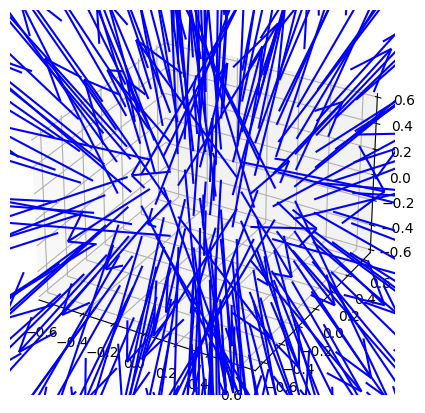

In [27]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = "3d")

for i in range(n):
    for j in range(n):
        for k in range(n):
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],Ey[i,j,k],Ez[i,j,k],color = "b")
            

center = [0, 0, 0]  
radius = 1 


theta = np.linspace(0, 2*np.pi, 100)
a = center[0] + radius * np.cos(theta)
b = center[1] + radius * np.sin(theta)
c = center[2] * np.ones_like(a)

#plt.plot(a, b, c, 'r')

plt.show()


In [21]:
Ex_z = np.zeros((n,n))
Ey_z = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        vector_de_campo = campo(x[i],y[j],0.6)
        Ex_z[i][j] = (vector_de_campo[0])
        Ey_z[i][j] = (vector_de_campo[1])

print(Ex_z)


[[-0.44648399 -0.53804766 -0.57663019 -0.57663019 -0.53804766 -0.44648399]
 [-0.32282923 -0.35778866 -0.34807311 -0.34807311 -0.35778866 -0.32282923]
 [-0.1153234  -0.11602457 -0.1022882  -0.1022882  -0.11602457 -0.1153234 ]
 [ 0.11532689  0.11602458  0.1022882   0.1022882   0.11602458  0.11532689]
 [ 0.32282643  0.35779054  0.34807361  0.34807361  0.35779054  0.32282643]
 [ 0.44648529  0.53804445  0.57663105  0.57663105  0.53804445  0.44648529]]


In [22]:
print(Ey_z)

[[-0.44648787 -0.32282322 -0.1153198   0.1153198   0.32282322  0.44648787]
 [-0.53804364 -0.35779018 -0.11602488  0.11602488  0.35779018  0.53804364]
 [-0.57663174 -0.34807343 -0.1022882   0.1022882   0.34807343  0.57663174]
 [-0.57663068 -0.34807359 -0.1022882   0.1022882   0.34807359  0.57663068]
 [-0.53804455 -0.35779049 -0.11602454  0.11602454  0.35779049  0.53804455]
 [-0.44648525 -0.32282666 -0.11532621  0.11532621  0.32282666  0.44648525]]
